<a href="https://colab.research.google.com/github/asxd-10/asxdDataScience/blob/master/DIP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 #shi khel gya bancho
import matplotlib.pyplot as plt
from skimage.feature import corner_harris, corner_peaks

In [ ]:
from google.colab.patches import cv2_imshow


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


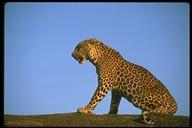

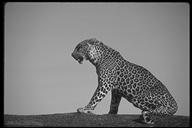

In [ ]:
image_path = "/content/drive/MyDrive/example2.jpg"
img = cv2.imread(image_path)
cv2_imshow(img)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# kernel = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
# gray = cv2.filter2D(gray, -1, kernel)
# gray = cv2.convertScaleAbs(gray, alpha=1, beta=0)
# gray =cv2.blur(gray,(3,3))
# gray = cv2.Canny(gray,100,200)


cv2_imshow(gray)


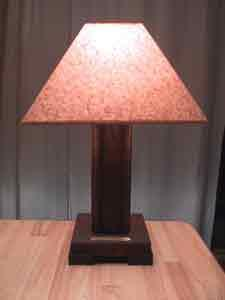

In [ ]:
cv2_imshow(img)

In [ ]:
final_img = harris(img,2,5)

cv2_imshow(final_img)

TypeError: ignored

In [ ]:
cv2.saliency

<module 'cv2.saliency'>

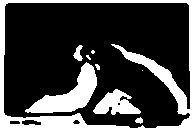

In [ ]:
saliency = cv2.saliency.StaticSaliencyFineGrained_create()

# kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
# gray = cv2.filter2D(gray, -1, kernel)

# gray =cv2.blur(gray,(4,4))
gray = cv2.GaussianBlur(gray,(3,3),0)

# gray = adjust_gamma(gray,1)
# gray =  cv2.equalizeHist(gray)
(success, saliencyMap) = saliency.computeSaliency(gray)
saliencyMap = (saliencyMap * 255).astype("uint8")
# print(saliencyMap)
threshMap =  cv2.threshold(saliencyMap.astype("uint8"), 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
# cv2.adaptiveThreshold(threshMap,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
#             cv2.THRESH_BINARY,11,2)
threshMap = cv2.medianBlur(threshMap,5)
# kernel = np.ones((3, 3), np.uint8)

# Using cv2.erode() method
# threshMap = cv2.erode(threshMap, kernel)

cv2_imshow(threshMap)

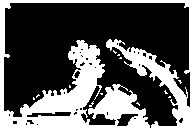

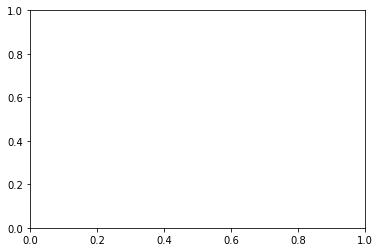

In [ ]:
#verification using inbuilt function
# filename = ''
# img = cv2.imread(filename)


dst = cv2.cornerHarris(threshMap,2,1,0.04)
dst = harris(threshMap,0.04)
# dst = corner_harris(threshMap)
corners = corner_peaks(dst)
fig, ax = plt.subplots()

ax.imshow(gray, interpolation='nearest', cmap=plt.cm.gray)

ax.plot(corners[:, 1], corners[:, 0], '.r', markersize=3)


cv2_imshow(dst)

In [ ]:
# s = np.linspace(0, 2*np.pi, 400)
# r = 100 + 100*np.sin(s)
# c = 220 + 100*np.cos(s)
# init = np.array([r, c]).T
# snake = active_contour(gray,
#                        init, alpha=0.015, beta=10, gamma=0.001)

# fig, ax = plt.subplots(figsize=(7, 7))
# ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
# print(snake[:,1])
# plt.show()

In [ ]:
from skimage.segmentation import active_contour

In [ ]:
def khudka_canny(snake,img):
  img_copy = img.copy()
  h,w = img_copy.shape
  for i in range(h):
    for j in range(w):
     img_copy[i][j] = 0
  # print(img_copy.shape)
  l,b = snake.shape
  for i in range(l):
    if(snake[i][1]<300 and snake[i][0]<225):
      img_copy[int(snake[i][0])][int(snake[i][1])] = 255
  img_copy = cv2.Canny(img_copy,100,200)
  return img_copy


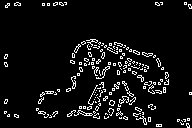

In [ ]:
cv2_imshow(khudka_canny(corners,gray))

In [ ]:
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

In [ ]:
def gradient_x(imggray):
    ##Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')
def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')




In [ ]:
from scipy import signal as sig
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.feature import corner_harris, corner_peaks

def harris(img,k):
  # imggray =  cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  imggray = img
  I_x = gradient_x(imggray)
  I_y = gradient_y(imggray)

  Ixx = ndi.gaussian_filter(I_x**2, sigma=1)
  Ixy = ndi.gaussian_filter(I_y*I_x, sigma=1)
  Iyy = ndi.gaussian_filter(I_y**2, sigma=1)


  # determinant
  detA = Ixx * Iyy - Ixy ** 2
  # trace
  traceA = Ixx + Iyy

  harris_response = detA - k * traceA ** 2
  img_copy_for_corners = np.copy(img)
  img_copy_for_edges = np.copy(img)

  for rowindex, response in enumerate(harris_response):
      for colindex, r in enumerate(response):
          if r > 0:
              # this is a corner
              img_copy_for_corners[rowindex, colindex] = 255
          elif r < 0:
              # this is an edge
              img_copy_for_edges[rowindex, colindex] = 255

  return img_copy_for_corners

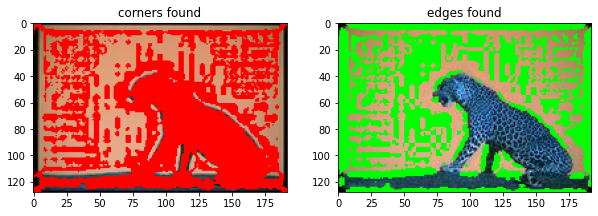

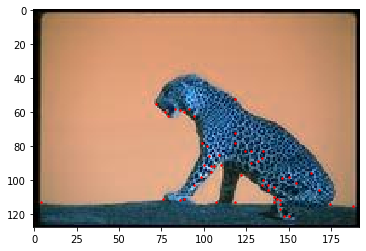

In [ ]:
k = 0.04
harris(img,k)